## ...Importing relevant libraries & loading data...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.svm import SVC
from sklearn import metrics
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [2]:
from nltk.tokenize import word_tokenize

In [13]:
df = pd.read_csv(r'C:\Users\ukwun\Documents\DS_Projects\Fake_News_NLP/train.csv')

In [14]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


## ...Data preprocessing...

In [15]:
df.shape

(20800, 5)

In [16]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [17]:
df.dropna(inplace=True)

In [18]:
df.shape

(18285, 5)

In [19]:
df.dtypes

id         int64
title     object
author    object
text      object
label      int64
dtype: object

In [20]:
df.reset_index(inplace=True)
df.drop(['index', 'id'], axis=1, inplace=True)

In [21]:
df.head(3)

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1


In [24]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

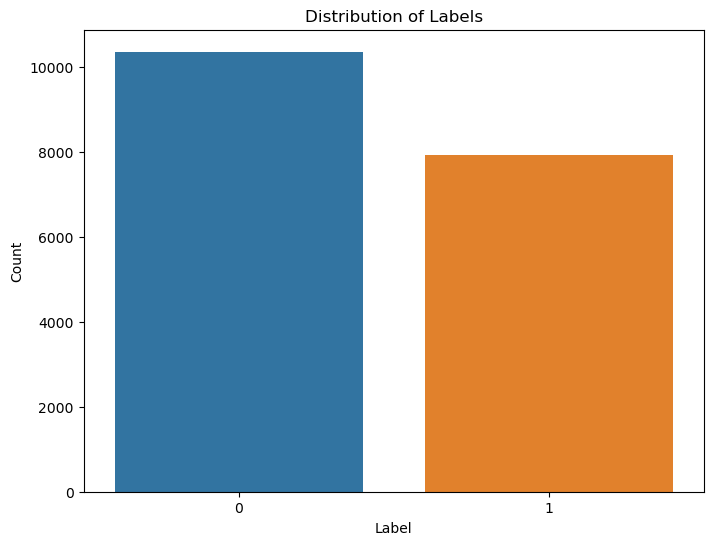

In [25]:
# Visualize the distribution of labels
colors = ['#1f77b4', '#ff7f0e']

plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df, palette=colors)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [26]:
label_counts = df['label'].value_counts()
total_samples = len(df)

# percentage of each label category
percentage_label_0 = (label_counts[0] / total_samples) * 100
percentage_label_1 = (label_counts[1] / total_samples) * 100

print("Percentage of label 0:", percentage_label_0)
print("Percentage of label 1:", percentage_label_1)

Percentage of label 0: 56.66393218485097
Percentage of label 1: 43.33606781514903


In [36]:
'''
The class distribution is relatively balanced, with approximately 56.66% of the samples 
belonging to label 0 and 43.34% belonging to label 1. 
Since the class distribution is not heavily skewed towards one class no need to perform
oversampling or undersampling

'''

'\nThe class distribution is relatively balanced, with approximately 56.66% of the samples \nbelonging to label 0 and 43.34% belonging to label 1. \nSince the class distribution is not heavily skewed towards one class no need to perform\noversampling or undersampling\n\n'

In [27]:
dataframe = df.copy()

In [28]:
# Remove special characters, punctuation, and numbers
# Tokenize the text into words
# Remove stopwords and stemmatize the words

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    
    cleaned_text = ' '.join(stemmed_tokens)
    return cleaned_text

In [30]:
dataframe['clean_title'] = dataframe['title'].apply(clean_text)
dataframe['clean_text'] = dataframe['text'].apply(clean_text)

In [34]:
dataframe.head(5)

,title,author,text,label,clean_title,clean_text
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,hous dem aid didnt even see comey letter jason...,hous dem aid didnt even see comey letter jason...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,flynn hillari clinton big woman campu breitbart,ever get feel life circl roundabout rather hea...
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,truth might get fire,truth might get fire octob tension intellig an...
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,civilian kill singl us airstrik identifi,video civilian kill singl us airstrik identifi...
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,iranian woman jail fiction unpublish stori wom...,print iranian woman sentenc six year prison ir...


In [37]:
dataframe.drop(['title', 'text'], axis=1, inplace=True)

In [39]:
dataframe.head(3)

,author,label,clean_title,clean_text
0,Darrell Lucus,1,hous dem aid didnt even see comey letter jason...,hous dem aid didnt even see comey letter jason...
1,Daniel J. Flynn,0,flynn hillari clinton big woman campu breitbart,ever get feel life circl roundabout rather hea...
2,Consortiumnews.com,1,truth might get fire,truth might get fire octob tension intellig an...


## ...Feature Extraction...

In [40]:
# Using TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [42]:
# Extracting TF-IDF features from the cleaned text data

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_vectorizer.fit(dataframe['clean_text'])

tfidf_features = tfidf_vectorizer.transform(dataframe['clean_text'])
tfidf_df = pd.DataFrame(tfidf_features.toarray(), 
                        columns=tfidf_vectorizer.get_feature_names_out())

In [43]:
tfidf_df.head(5)

,aaron,abandon,abc,abe,abedin,abil,abl,aboard,abort,abroad,...,youth,youtub,youv,zealand,zero,zika,zionist,zone,zu,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.020658,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.053340,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## ...Model Building and Training...

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [45]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, dataframe['label'], 
                                                    test_size=0.25, random_state=42)

In [46]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [47]:
y_pred = model.predict(X_test)

In [48]:
# Model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9409448818897638

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2600
           1       0.94      0.92      0.93      1972

    accuracy                           0.94      4572
   macro avg       0.94      0.94      0.94      4572
weighted avg       0.94      0.94      0.94      4572



In [50]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[2487,  113],
       [ 157, 1815]], dtype=int64)

([<matplotlib.axis.YTick at 0x1b9dcb1f710>,
 [Text(0, 0, 'positive'), Text(0, 1, 'negative')])

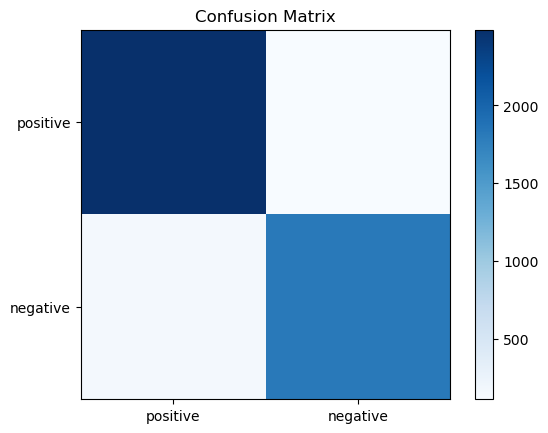

In [51]:
plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Confusion Matrix')
labels = ['positive', 'negative']
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

#### Detect which is fake and real word

In [53]:
feature_names = tfidf_vectorizer.get_feature_names_out()

In [54]:
feature_names

array(['aaron', 'abandon', 'abc', ..., 'zone', 'zu', 'zuckerberg'],
      dtype=object)

In [56]:
'''
The most negative value is the most fake word, if we go towards lower value in negative (-ve),
we have most fake value

'''

coefficients = model.coef_[0]
print("Coefficients:", coefficients)

Coefficients: [-0.75353904  0.00911032 -0.19410358 ...  0.4952476   0.4351955
 -0.63343842]


In [57]:
# Most 20 real values
sorted(zip(model.coef_[0],feature_names),reverse=True)[0:20]

[(8.783426097007837, 'us'),
 (7.262031345225193, 'octob'),
 (5.794740081912883, 'hillari'),
 (5.672426586431804, 'novemb'),
 (4.413685635006818, 'yearold'),
 (4.248819328775006, 'clinton'),
 (3.8749273046610075, 'sourc'),
 (3.7002870507276184, 'comment'),
 (3.35229086529693, 'share'),
 (3.1704965825993563, 'presidentelect'),
 (3.014017537067186, 'elect'),
 (2.8826266533366764, 'via'),
 (2.8108423220645453, 'snip'),
 (2.8102056111124645, 'fbi'),
 (2.727446621769928, 'howev'),
 (2.616566694838571, 'post'),
 (2.537431682974021, 'click'),
 (2.4547925044365018, 'articl'),
 (2.3779280407903576, 'email'),
 (2.230989382357644, 'pm')]